In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/content/Fatal_Collisions.csv')

In [ ]:
df=df.iloc[:,2:]

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
0,3363207,882024.0,2006,2006/01/07 05:00:00+00,2325,STEELES AVE E,NINTH LINE ST,NaN,Minor Arterial,Scarborough,25.0,43.842745,-79.22479,Mid-Block,NaN,No Control,Clear,Dark,Wet,Fatal,Approaching,Driver,50 to 54,Fatal,NaN,West,"Automobile, Station Wagon",Going Ahead,Lost control,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,Morningside Heights,131,Rouge (131),D42,1
1,3363869,882497.0,2006,2006/01/08 05:00:00+00,1828,ISLINGTON AVE,GOLFDOWN DR,NaN,Major Arterial,Etobicoke York,1.0,43.721445,-79.55809,Intersection,At Intersection,Pedestrian Crossover,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Pedestrian,10 to 14,Fatal,NaN,East,Other,NaN,NaN,NaN,Pedestrian hit a PXO/ped. Mid-block signal,"Crossing, Pedestrian Crossover",Normal,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,5,Elms-Old Rexdale,5,Elms-Old Rexdale (5),D23,2
2,3363416,882174.0,2006,2006/01/09 05:00:00+00,1435,KENNEDY RD,GLAMORGAN AVE,NaN,Major Arterial,Scarborough,21.0,43.769445,-79.28229,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Pedestrian,75 to 79,Fatal,NaN,East,Other,NaN,NaN,NaN,Vehicle is going straight thru inter.while ped...,Crossing without right of way,Unknown,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126,Dorset Park,126,Dorset Park (126),D41,3
3,3363879,882501.0,2006,2006/01/11 05:00:00+00,1120,BARTLEY DR,JINNAH CRT,NaN,Collector,North York,16.0,43.722045,-79.30799,Intersection,NaN,No Control,Clear,Daylight,Wet,Fatal,SMV Other,Passenger,15 to 19,Fatal,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,NaN,NaN,43,Victoria Village,43,Victoria Village (43),D55,4
4,3371161,886230.0,2006,2006/01/21 05:00:00+00,1829,MIDLAND AVE,GOODLAND GT,NaN,Major Arterial,Scarborough,2223.0,43.779345,-79.27559,Intersection,At Intersection,No Control,Clear,Dusk,Dry,Fatal,Pedestrian Collisions,Pedestrian,50 to 54,Fatal,NaN,West,Other,NaN,NaN,NaN,Pedestrian hit at mid-block,"Crossing, no Traffic Control",Normal,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,128,Agincourt South-Malvern West,128,Agincourt South-Malvern West (128),D42,5


In [ ]:
binary_cols=['PEDESTRIAN',
'CYCLIST',
'AUTOMOBILE',
'MOTORCYCLE',
'TRUCK',
'TRSN_CITY_VEH',
'EMERG_VEH',
'PASSENGER',
'SPEEDING',
'AG_DRIV',
'REDLIGHT',
'ALCOHOL',
'DISABILITY',
]

In [ ]:
df[binary_cols] = df[binary_cols].fillna('No')

In [ ]:
df[binary_cols] = df[binary_cols].replace(('Yes', 'No'), (1, 0))

In [ ]:
df.head()

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
0,3363207,882024.0,2006,2006/01/07 05:00:00+00,2325,STEELES AVE E,NINTH LINE ST,NaN,Minor Arterial,Scarborough,25.0,43.842745,-79.22479,Mid-Block,NaN,No Control,Clear,Dark,Wet,Fatal,Approaching,Driver,50 to 54,Fatal,NaN,West,"Automobile, Station Wagon",Going Ahead,Lost control,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,144,Morningside Heights,131,Rouge (131),D42,1
1,3363869,882497.0,2006,2006/01/08 05:00:00+00,1828,ISLINGTON AVE,GOLFDOWN DR,NaN,Major Arterial,Etobicoke York,1.0,43.721445,-79.55809,Intersection,At Intersection,Pedestrian Crossover,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Pedestrian,10 to 14,Fatal,NaN,East,Other,NaN,NaN,NaN,Pedestrian hit a PXO/ped. Mid-block signal,"Crossing, Pedestrian Crossover",Normal,NaN,NaN,NaN,1,0,1,0,0,0,0,1,0,1,0,0,0,5,Elms-Old Rexdale,5,Elms-Old Rexdale (5),D23,2
2,3363416,882174.0,2006,2006/01/09 05:00:00+00,1435,KENNEDY RD,GLAMORGAN AVE,NaN,Major Arterial,Scarborough,21.0,43.769445,-79.28229,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Pedestrian,75 to 79,Fatal,NaN,East,Other,NaN,NaN,NaN,Vehicle is going straight thru inter.while ped...,Crossing without right of way,Unknown,NaN,NaN,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,126,Dorset Park,126,Dorset Park (126),D41,3
3,3363879,882501.0,2006,2006/01/11 05:00:00+00,1120,BARTLEY DR,JINNAH CRT,NaN,Collector,North York,16.0,43.722045,-79.30799,Intersection,NaN,No Control,Clear,Daylight,Wet,Fatal,SMV Other,Passenger,15 to 19,Fatal,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,1,1,1,0,0,0,43,Victoria Village,43,Victoria Village (43),D55,4
4,3371161,886230.0,2006,2006/01/21 05:00:00+00,1829,MIDLAND AVE,GOODLAND GT,NaN,Major Arterial,Scarborough,2223.0,43.779345,-79.27559,Intersection,At Intersection,No Control,Clear,Dusk,Dry,Fatal,Pedestrian Collisions,Pedestrian,50 to 54,Fatal,NaN,West,Other,NaN,NaN,NaN,Pedestrian hit at mid-block,"Crossing, no Traffic Control",Normal,NaN,NaN,NaN,1,0,1,0,0,0,0,0,1,1,0,0,0,128,Agincourt South-Malvern West,128,Agincourt South-Malvern West (128),D42,5


In [ ]:
null_rate = round(df.isna().sum().sort_values(ascending=False) / len(df) * 100, 2)

In [ ]:
null_rate

CYCCOND              95.38
CYCACT               95.38
CYCLISTYPE           95.27
OFFSET               89.58
DRIVACT              71.32
DRIVCOND             71.32
MANOEUVER            65.63
PEDCOND              45.33
PEDTYPE              45.01
PEDACT               44.90
VEHTYPE              42.00
ACCNUM               36.09
ACCLOC               28.03
INITDIR              11.82
FATAL_NO             11.60
STREET2              10.10
WARDNUM               8.59
ROAD_CLASS            2.69
RDSFCOND              1.18
VISIBILITY            1.07
DISTRICT              0.54
TRAFFCTL              0.21
IMPACTYPE             0.11
TRSN_CITY_VEH         0.00
AG_DRIV               0.00
EMERG_VEH             0.00
PASSENGER             0.00
SPEEDING              0.00
MOTORCYCLE            0.00
REDLIGHT              0.00
ALCOHOL               0.00
DISABILITY            0.00
HOOD_158              0.00
NEIGHBOURHOOD_158     0.00
HOOD_140              0.00
NEIGHBOURHOOD_140     0.00
DIVISION              0.00
T

In [ ]:
df['TIME']

0      2325
1      1828
2      1435
3      1120
4      1829
       ... 
926    2305
927     713
928    1810
929     407
930    2325
Name: TIME, Length: 931, dtype: int64

In [ ]:
df['TIME'] = df['TIME'].astype('str')

In [ ]:
df['TIME']  = df['TIME'].str.rjust(width=4, fillchar='0')
df['TIME'] = df['TIME'].str.split('(\d+)(\d\d)').str.join(':').str.strip(':')

In [ ]:
df['TIME']

0      23:25
1      18:28
2      14:35
3      11:20
4      18:29
       ...  
926    23:05
927    07:13
928    18:10
929    04:07
930    23:25
Name: TIME, Length: 931, dtype: object

In [ ]:
df['TIME'].replace('24:00','00:00', inplace=True)
df['HOUR']=df['TIME'].str.slice(start=0, stop=2).astype(int)

In [ ]:
df['HOUR']

0      23
1      18
2      14
3      11
4      18
       ..
926    23
927     7
928    18
929     4
930    23
Name: HOUR, Length: 931, dtype: int64

In [ ]:
df.loc[(df['HOUR'] >= 0) & (df['HOUR'] < 6),'HOURS'] = 'NIGHT'
df.loc[(df['HOUR'] >= 6) & (df['HOUR'] < 12),'HOURS'] = 'MORNING'
df.loc[(df['HOUR'] >= 12) & (df['HOUR'] < 18),'HOURS'] = 'AFTERNOON'
df.loc[(df['HOUR'] >= 18) & (df['HOUR'] < 24),'HOURS'] = 'EVENING'
df.drop('HOUR', axis=1, inplace=True)

<Axes: xlabel='HOURS', ylabel='Count'>

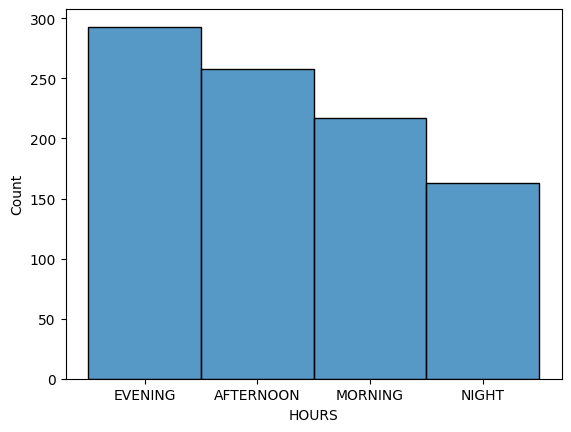

In [ ]:
sns.histplot(df['HOURS'])

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
df['WEEKDAY'] = df['DATE'].dt.weekday

In [ ]:
df['WEEKDAY'].value_counts()

4    164
1    155
3    139
5    129
2    125
6    113
0    106
Name: WEEKDAY, dtype: int64

<Axes: xlabel='WEEKDAY', ylabel='Count'>

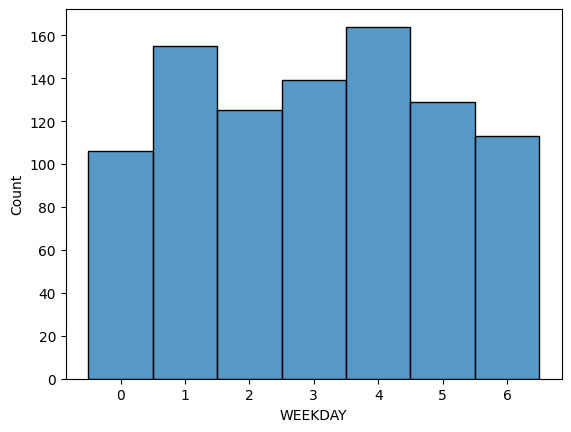

In [ ]:
sns.histplot(df['WEEKDAY'],discrete=True)

In [ ]:
len(df['YEAR'].unique())

17

In [ ]:
df.loc[(df['YEAR'] >= 2006) & (df['YEAR'] < 2009),'YEARS'] = '06~08'
df.loc[(df['YEAR'] >= 2009) & (df['YEAR'] < 2012),'YEARS'] = '09~11'
df.loc[(df['YEAR'] >= 2012) & (df['YEAR'] < 2015),'YEARS'] = '12~14'
df.loc[(df['YEAR'] >= 2015) & (df['YEAR'] < 2018),'YEARS'] = '15~17'
df.loc[(df['YEAR'] >= 2018) & (df['YEAR'] < 2021),'YEARS'] = '18~20'
df.loc[(df['YEAR'] >= 2021),'YEARS'] = '21~22'

In [ ]:
df.INVAGE.unique()

array(['50 to 54', '10 to 14', '75 to 79', '15 to 19', '35 to 39',
       '45 to 49', '70 to 74', '80 to 84', '30 to 34', '5 to 9',
       '65 to 69', '40 to 44', '20 to 24', '55 to 59', '0 to 4',
       '25 to 29', '85 to 89', '60 to 64', '90 to 94', 'unknown',
       'Over 95'], dtype=object)

In [ ]:
df['INVAGE'] == '10 to 14'

0      False
1       True
2      False
3      False
4      False
       ...  
926    False
927    False
928    False
929    False
930    False
Name: INVAGE, Length: 931, dtype: bool

In [ ]:
df.loc[(df['INVAGE'] == 'unknown')  ,'AGES'] = 'unknown'
df.loc[(df['INVAGE'] == '0 to 4') | (df['INVAGE'] == '5 to 9') ,'AGES'] = 'Baby'
df.loc[(df['INVAGE'] == '10 to 14') | (df['INVAGE'] == '15 to 19') | (df['INVAGE'] == '20 to 24') ,'AGES'] = 'Youth'
df.loc[(df['INVAGE'] == '25 to 29') | (df['INVAGE'] == '30 to 34') | (df['INVAGE'] == '35 to 39')\
       | (df['INVAGE'] == '40 to 44') | (df['INVAGE'] == '45 to 49') | (df['INVAGE'] == '50 to 54')\
       | (df['INVAGE'] == '55 to 59') | (df['INVAGE'] == '60 to 64'),'AGES'] = 'Adults'
df.loc[(df['INVAGE'] == '65 to 69') | (df['INVAGE'] == '70 to 74') | (df['INVAGE'] == '75 to 79')\
       | (df['INVAGE'] == '80 to 84') | (df['INVAGE'] == '85 to 89') | (df['INVAGE'] == '90 to 94')\
       | (df['INVAGE'] == 'Over 95'),'AGES'] = 'SENIOR'

<Axes: xlabel='AGES', ylabel='Count'>

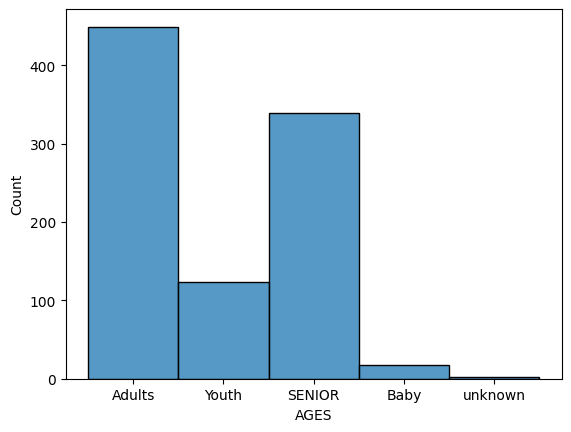

In [ ]:
sns.histplot(df['AGES'])

In [ ]:
df.head()

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId,HOURS,WEEKDAY,YEARS,AGES
0,3363207,882024.0,2006,2006-01-07 05:00:00+00:00,23:25,STEELES AVE E,NINTH LINE ST,NaN,Minor Arterial,Scarborough,25.0,43.842745,-79.22479,Mid-Block,NaN,No Control,Clear,Dark,Wet,Fatal,Approaching,Driver,50 to 54,Fatal,NaN,West,"Automobile, Station Wagon",Going Ahead,Lost control,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,144,Morningside Heights,131,Rouge (131),D42,1,EVENING,5,06~08,Adults
1,3363869,882497.0,2006,2006-01-08 05:00:00+00:00,18:28,ISLINGTON AVE,GOLFDOWN DR,NaN,Major Arterial,Etobicoke York,1.0,43.721445,-79.55809,Intersection,At Intersection,Pedestrian Crossover,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Pedestrian,10 to 14,Fatal,NaN,East,Other,NaN,NaN,NaN,Pedestrian hit a PXO/ped. Mid-block signal,"Crossing, Pedestrian Crossover",Normal,NaN,NaN,NaN,1,0,1,0,0,0,0,1,0,1,0,0,0,5,Elms-Old Rexdale,5,Elms-Old Rexdale (5),D23,2,EVENING,6,06~08,Youth
2,3363416,882174.0,2006,2006-01-09 05:00:00+00:00,14:35,KENNEDY RD,GLAMORGAN AVE,NaN,Major Arterial,Scarborough,21.0,43.769445,-79.28229,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Pedestrian,75 to 79,Fatal,NaN,East,Other,NaN,NaN,NaN,Vehicle is going straight thru inter.while ped...,Crossing without right of way,Unknown,NaN,NaN,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,126,Dorset Park,126,Dorset Park (126),D41,3,AFTERNOON,0,06~08,SENIOR
3,3363879,882501.0,2006,2006-01-11 05:00:00+00:00,11:20,BARTLEY DR,JINNAH CRT,NaN,Collector,North York,16.0,43.722045,-79.30799,Intersection,NaN,No Control,Clear,Daylight,Wet,Fatal,SMV Other,Passenger,15 to 19,Fatal,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,1,1,1,0,0,0,43,Victoria Village,43,Victoria Village (43),D55,4,MORNING,2,06~08,Youth
4,3371161,886230.0,2006,2006-01-21 05:00:00+00:00,18:29,MIDLAND AVE,GOODLAND GT,NaN,Major Arterial,Scarborough,2223.0,43.779345,-79.27559,Intersection,At Intersection,No Control,Clear,Dusk,Dry,Fatal,Pedestrian Collisions,Pedestrian,50 to 54,Fatal,NaN,West,Other,NaN,NaN,NaN,Pedestrian hit at mid-block,"Crossing, no Traffic Control",Normal,NaN,NaN,NaN,1,0,1,0,0,0,0,0,1,1,0,0,0,128,Agincourt South-Malvern West,128,Agincourt South-Malvern West (128),D42,5,EVENING,5,06~08,Adults


In [ ]:
# drop columns with nulls more than 40%
df.drop(null_rate[null_rate > 40].index, axis = 1, inplace = True)

In [ ]:
df.head()

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,ROAD_CLASS,DISTRICT,WARDNUM,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId,HOURS,WEEKDAY,YEARS,AGES
0,3363207,882024.0,2006,2006-01-07 05:00:00+00:00,23:25,STEELES AVE E,NINTH LINE ST,Minor Arterial,Scarborough,25.0,43.842745,-79.22479,Mid-Block,NaN,No Control,Clear,Dark,Wet,Fatal,Approaching,Driver,50 to 54,Fatal,NaN,West,0,0,1,0,0,0,0,0,0,0,0,0,0,144,Morningside Heights,131,Rouge (131),D42,1,EVENING,5,06~08,Adults
1,3363869,882497.0,2006,2006-01-08 05:00:00+00:00,18:28,ISLINGTON AVE,GOLFDOWN DR,Major Arterial,Etobicoke York,1.0,43.721445,-79.55809,Intersection,At Intersection,Pedestrian Crossover,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Pedestrian,10 to 14,Fatal,NaN,East,1,0,1,0,0,0,0,1,0,1,0,0,0,5,Elms-Old Rexdale,5,Elms-Old Rexdale (5),D23,2,EVENING,6,06~08,Youth
2,3363416,882174.0,2006,2006-01-09 05:00:00+00:00,14:35,KENNEDY RD,GLAMORGAN AVE,Major Arterial,Scarborough,21.0,43.769445,-79.28229,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Pedestrian,75 to 79,Fatal,NaN,East,1,0,1,0,0,0,0,0,0,0,0,0,0,126,Dorset Park,126,Dorset Park (126),D41,3,AFTERNOON,0,06~08,SENIOR
3,3363879,882501.0,2006,2006-01-11 05:00:00+00:00,11:20,BARTLEY DR,JINNAH CRT,Collector,North York,16.0,43.722045,-79.30799,Intersection,NaN,No Control,Clear,Daylight,Wet,Fatal,SMV Other,Passenger,15 to 19,Fatal,NaN,NaN,0,0,1,0,0,0,0,1,1,1,0,0,0,43,Victoria Village,43,Victoria Village (43),D55,4,MORNING,2,06~08,Youth
4,3371161,886230.0,2006,2006-01-21 05:00:00+00:00,18:29,MIDLAND AVE,GOODLAND GT,Major Arterial,Scarborough,2223.0,43.779345,-79.27559,Intersection,At Intersection,No Control,Clear,Dusk,Dry,Fatal,Pedestrian Collisions,Pedestrian,50 to 54,Fatal,NaN,West,1,0,1,0,0,0,0,0,1,1,0,0,0,128,Agincourt South-Malvern West,128,Agincourt South-Malvern West (128),D42,5,EVENING,5,06~08,Adults


In [ ]:
df.DISTRICT.value_counts()

Scarborough              267
Toronto and East York    236
Etobicoke York           222
North York               201
Name: DISTRICT, dtype: int64

In [ ]:
drop_cols = [
    'INDEX_', # we have objectID
    'ACCNUM', # just another index
    'DATE', # not accurate, will use WEEKDAY
    'YEAR', # will use YEARS
    'TIME', # we will use HOURS
    'INVAGE', # will use AGES
    'STREET1', # we will use DISTRICT for location information
    'STREET2', # we will use DISTRICT for location information
    'WARDNUM', # I'm not sure about this........
    'LATITUDE', # we will use DISTRICT for location information
    'LONGITUDE', # we will use DISTRICT for location information
    'ACCLOC', # we will use LOCCORD
    'ACCLASS', # It is filtered data using this column, so there is only 'Fatal' value
    'INJURY', # Same with ACCLASS
    'FATAL_NO', # just sequential number of FATAL Accidents
    'HOOD_158', # we will use DISTRICT for location information
    'HOOD_140', # Too many categories
    'NEIGHBOURHOOD_140', # Too many categories
    'NEIGHBOURHOOD_158', # Too many categories
    'DIVISION' # # we will use DISTRICT for location information
]

In [ ]:
df.drop(drop_cols, axis=1, inplace = True)

In [ ]:
df

,ROAD_CLASS,DISTRICT,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,INITDIR,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,ObjectId,HOURS,WEEKDAY,YEARS,AGES
0,Minor Arterial,Scarborough,Mid-Block,No Control,Clear,Dark,Wet,Approaching,Driver,West,0,0,1,0,0,0,0,0,0,0,0,0,0,1,EVENING,5,06~08,Adults
1,Major Arterial,Etobicoke York,Intersection,Pedestrian Crossover,Clear,Dark,Dry,Pedestrian Collisions,Pedestrian,East,1,0,1,0,0,0,0,1,0,1,0,0,0,2,EVENING,6,06~08,Youth
2,Major Arterial,Scarborough,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Pedestrian,East,1,0,1,0,0,0,0,0,0,0,0,0,0,3,AFTERNOON,0,06~08,SENIOR
3,Collector,North York,Intersection,No Control,Clear,Daylight,Wet,SMV Other,Passenger,NaN,0,0,1,0,0,0,0,1,1,1,0,0,0,4,MORNING,2,06~08,Youth
4,Major Arterial,Scarborough,Intersection,No Control,Clear,Dusk,Dry,Pedestrian Collisions,Pedestrian,West,1,0,1,0,0,0,0,0,1,1,0,0,0,5,EVENING,5,06~08,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,Minor Arterial,Scarborough,Mid-Block,No Control,Clear,"Dark, artificial",Dry,Pedestrian Collisions,Pedestrian,East,1,0,1,0,0,0,0,1,0,0,0,0,0,927,EVENING,5,15~17,SENIOR
927,Major Arterial,Toronto and East York,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Pedestrian,Unknown,1,0,1,0,0,0,0,0,1,1,0,0,0,928,MORNING,0,15~17,SENIOR
928,Major Arterial,Scarborough,Intersection,Traffic Signal,Clear,Daylight,Dry,Rear End,Driver,West,0,0,1,0,0,1,0,0,0,0,0,0,0,929,EVENING,3,15~17,Adults
929,Major Arterial,Toronto and East York,Mid-Block,No Control,Rain,"Dark, artificial",Wet,Pedestrian Collisions,Pedestrian,Unknown,1,0,1,0,0,0,0,0,0,0,0,0,0,930,NIGHT,1,15~17,Adults


In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

ROAD_CLASS     25
DISTRICT        5
TRAFFCTL        2
VISIBILITY     10
RDSFCOND       11
IMPACTYPE       1
INITDIR       110
dtype: int64

In [ ]:
# There are already the value 'Unknown'
df.INITDIR.fillna('Unknown', inplace=True)

In [ ]:
# Since only a maximum of 49 rows can be removed, it is better to delete them instead of imputing inaccurate information.
print('# of values before dropna: ',len(df))
df.dropna(inplace=True)
print('# of values after dropna: ',len(df))

# of values before dropna:  931
# of values after dropna:  886


In [ ]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,ObjectId,WEEKDAY
PEDESTRIAN,1.000000,-0.265006,-0.097843,-0.369892,0.013172,0.029276,-0.038969,-0.336818,-0.379428,-0.239763,-0.152995,-0.097523,-0.078969,-0.005725,-0.073748
CYCLIST,-0.265006,1.000000,-0.109522,-0.056826,0.118157,0.011116,-0.007684,-0.093041,-0.045419,-0.033488,0.040436,-0.002097,-0.031973,-0.045725,-0.036614
AUTOMOBILE,-0.097843,-0.109522,1.000000,-0.125231,-0.544321,-0.395121,-0.075989,0.150770,0.145820,0.101672,0.084139,0.098680,0.061871,0.007658,0.093008
MOTORCYCLE,-0.369892,-0.056826,-0.125231,1.000000,-0.066004,-0.080368,0.103189,-0.059239,0.181909,0.145760,0.002238,-0.054634,-0.045563,0.032551,0.028217
TRUCK,0.013172,0.118157,-0.544321,-0.066004,1.000000,-0.075629,-0.011854,-0.040133,-0.053037,-0.000130,-0.039044,-0.078669,0.029370,0.020230,-0.112693
TRSN_CITY_VEH,0.029276,0.011116,-0.395121,-0.080368,-0.075629,1.000000,-0.009769,0.022166,-0.077431,-0.039691,0.004149,-0.005369,-0.040647,-0.063783,-0.057679
EMERG_VEH,-0.038969,-0.007684,-0.075989,0.103189,-0.011854,-0.009769,1.000000,-0.019028,-0.016379,0.036467,0.123620,-0.007499,-0.004702,0.009717,0.017827
PASSENGER,-0.336818,-0.093041,0.150770,-0.059239,-0.040133,0.022166,-0.019028,1.000000,0.178834,0.117474,0.085240,0.109129,-0.002404,0.011990,0.057468
SPEEDING,-0.379428,-0.045419,0.145820,0.181909,-0.053037,-0.077431,-0.016379,0.178834,1.000000,0.528614,-0.019293,0.161068,-0.047259,0.010107,0.100763
AG_DRIV,-0.239763,-0.033488,0.101672,0.145760,-0.000130,-0.039691,0.036467,0.117474,0.528614,1.000000,0.294991,0.082136,-0.079398,-0.052876,0.046332


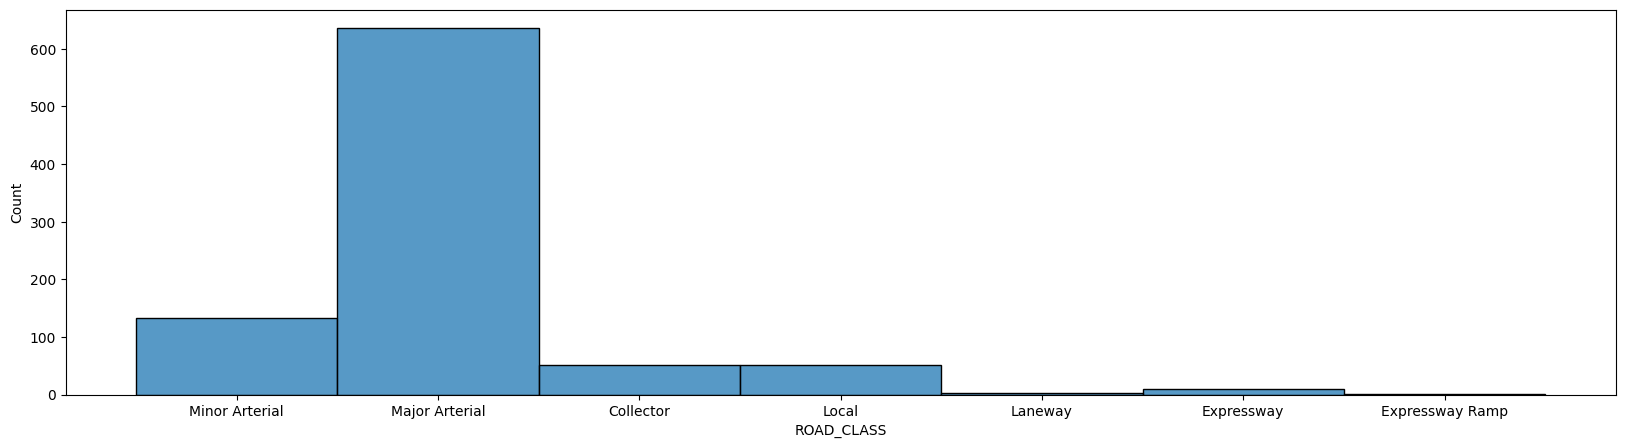

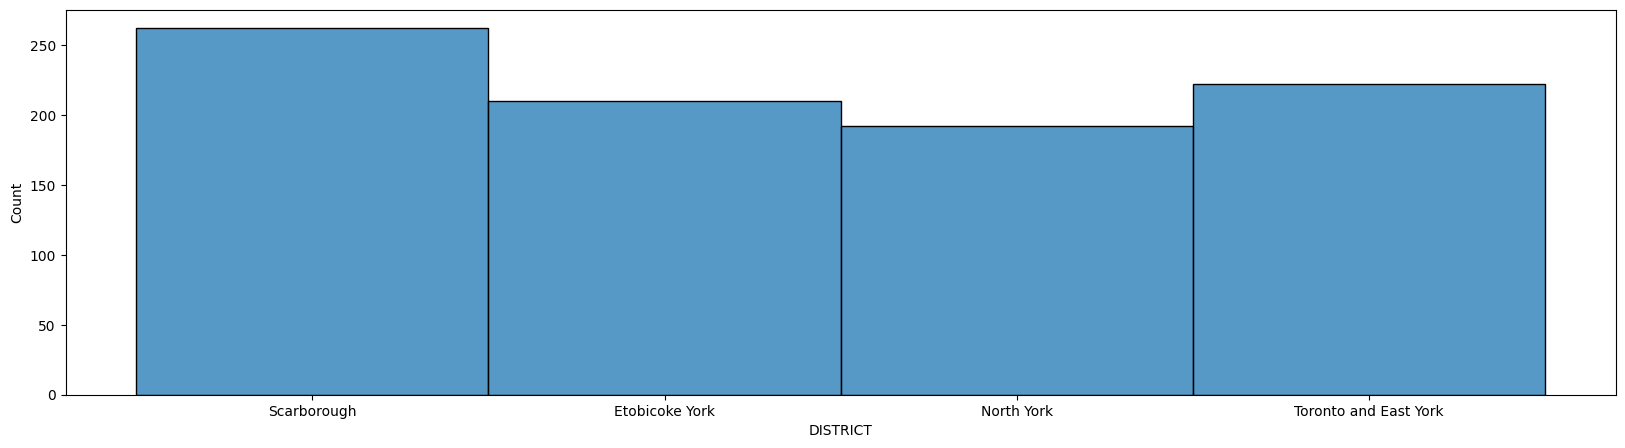

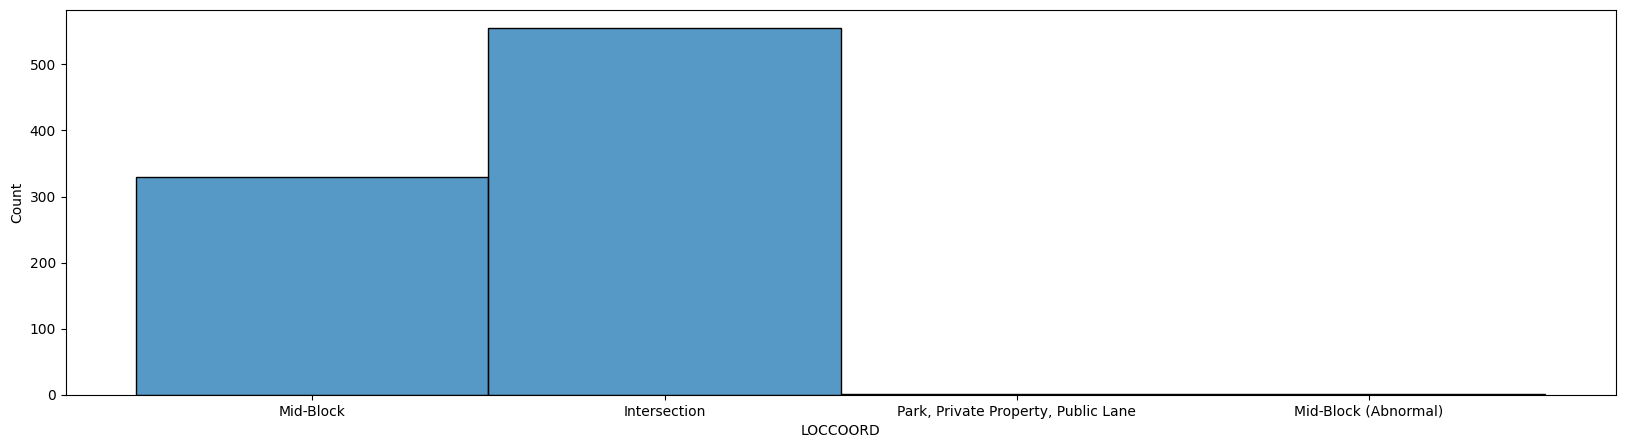

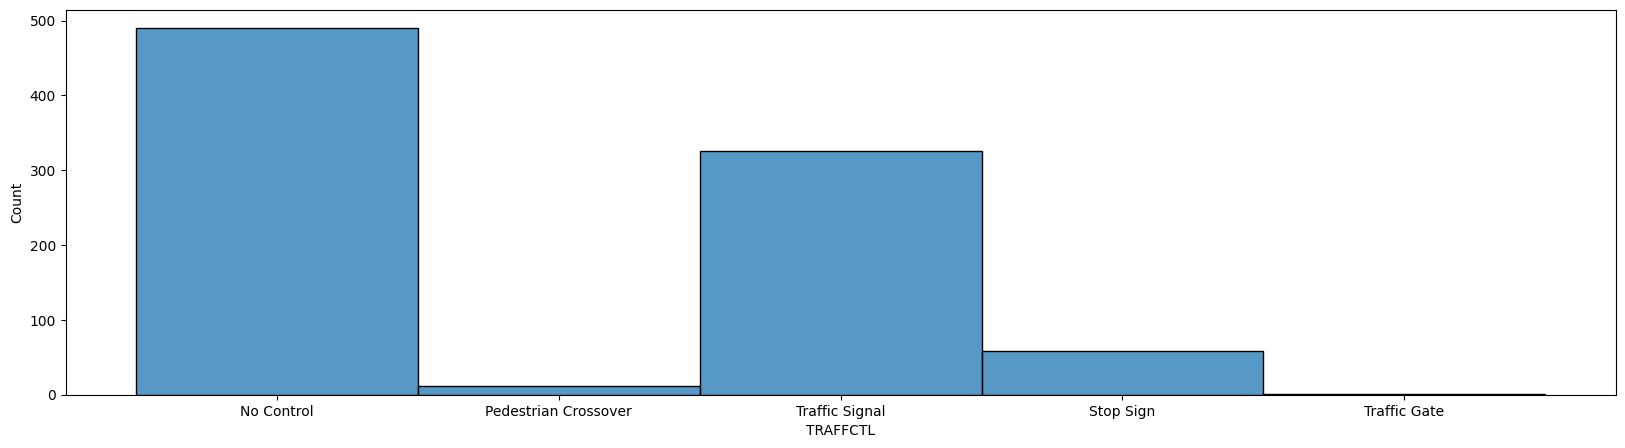

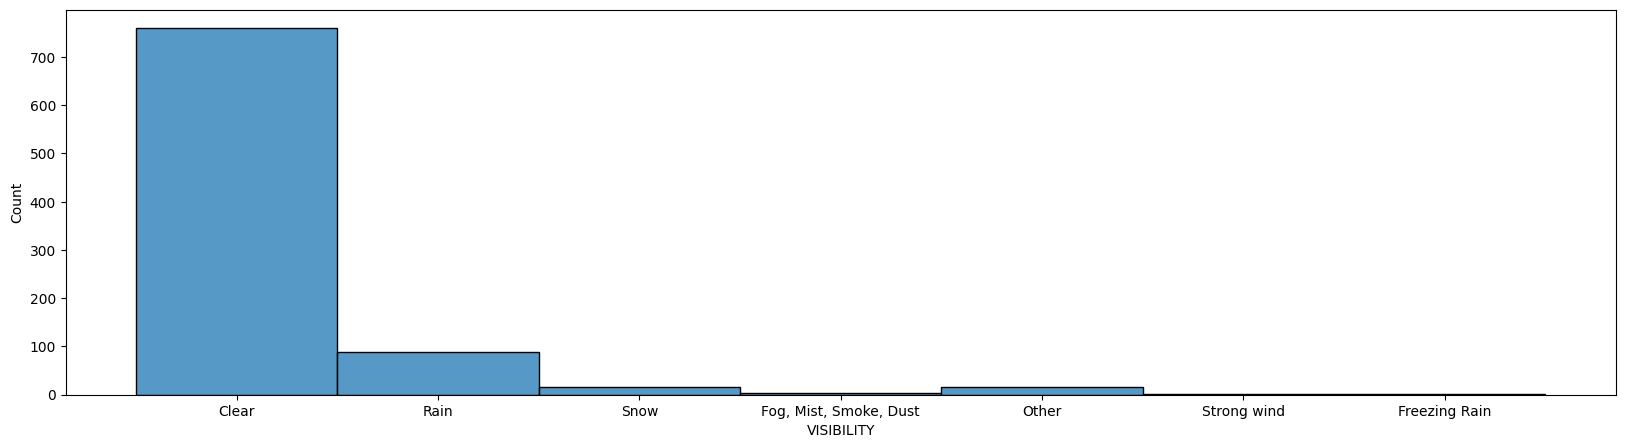

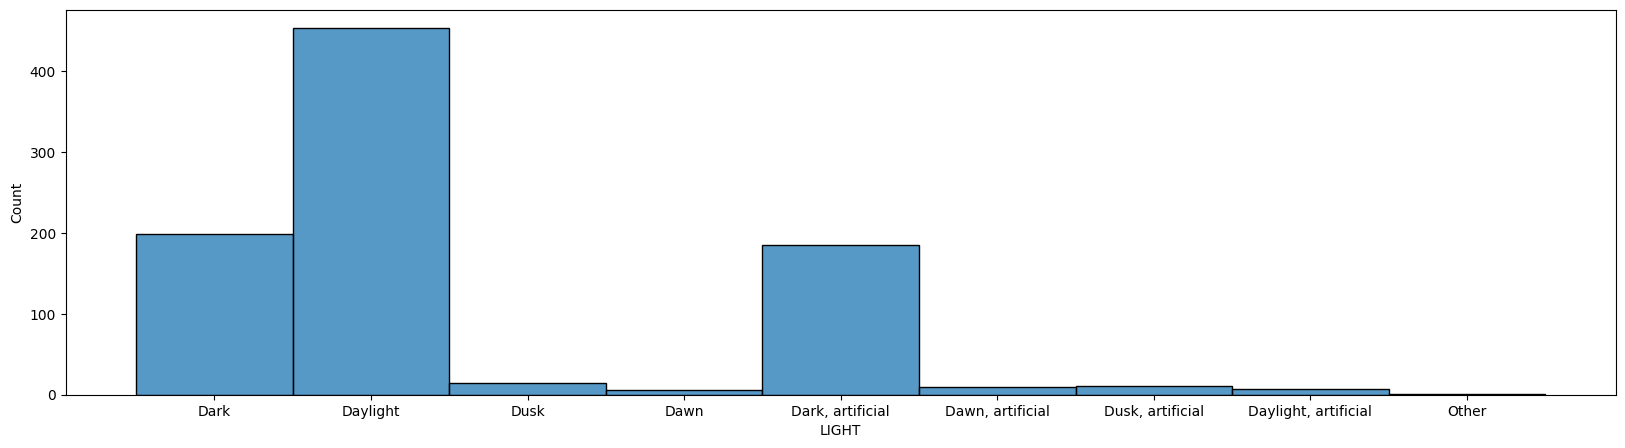

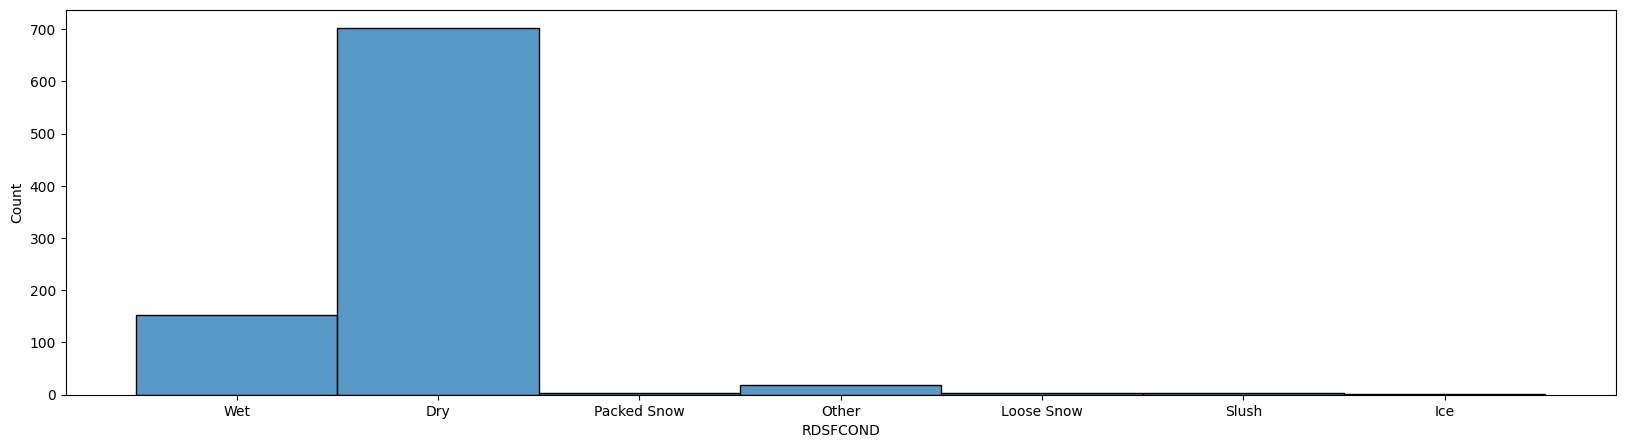

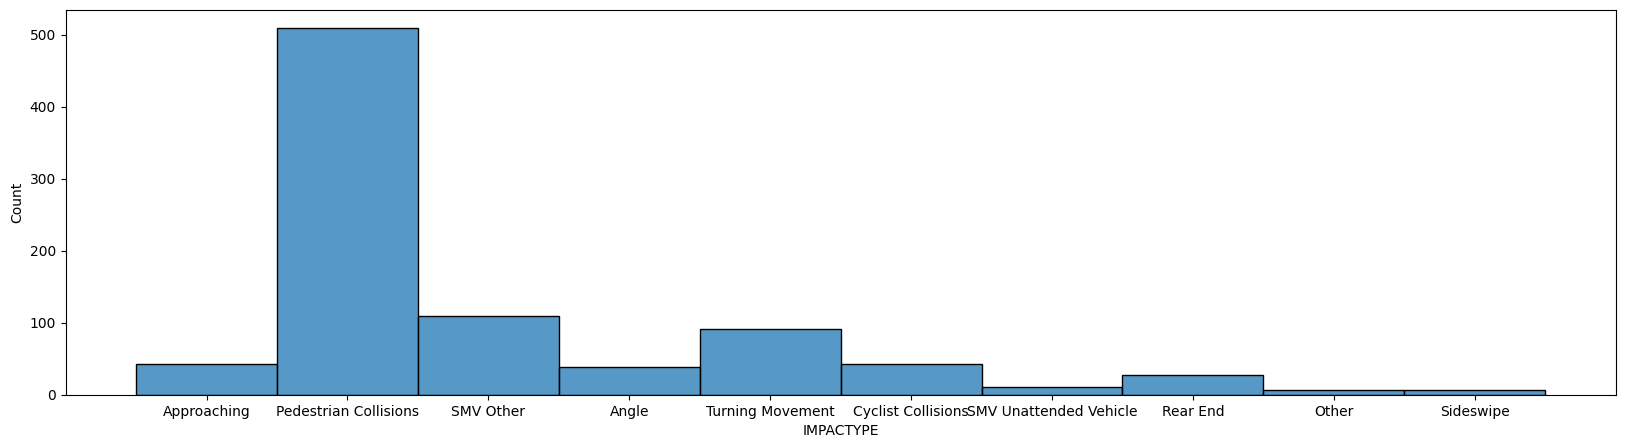

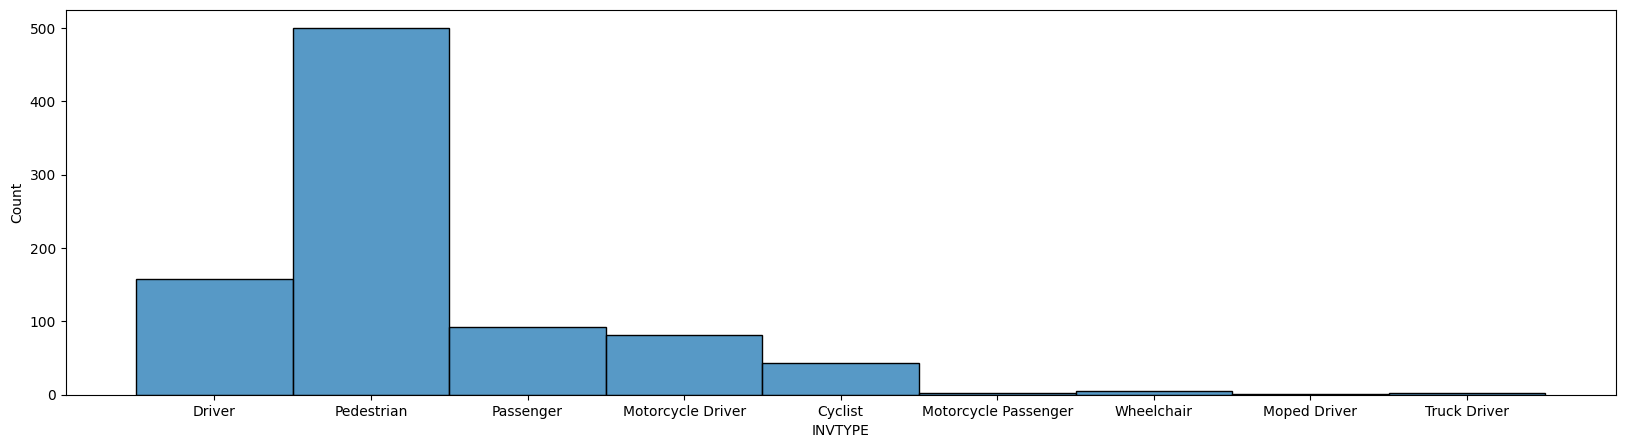

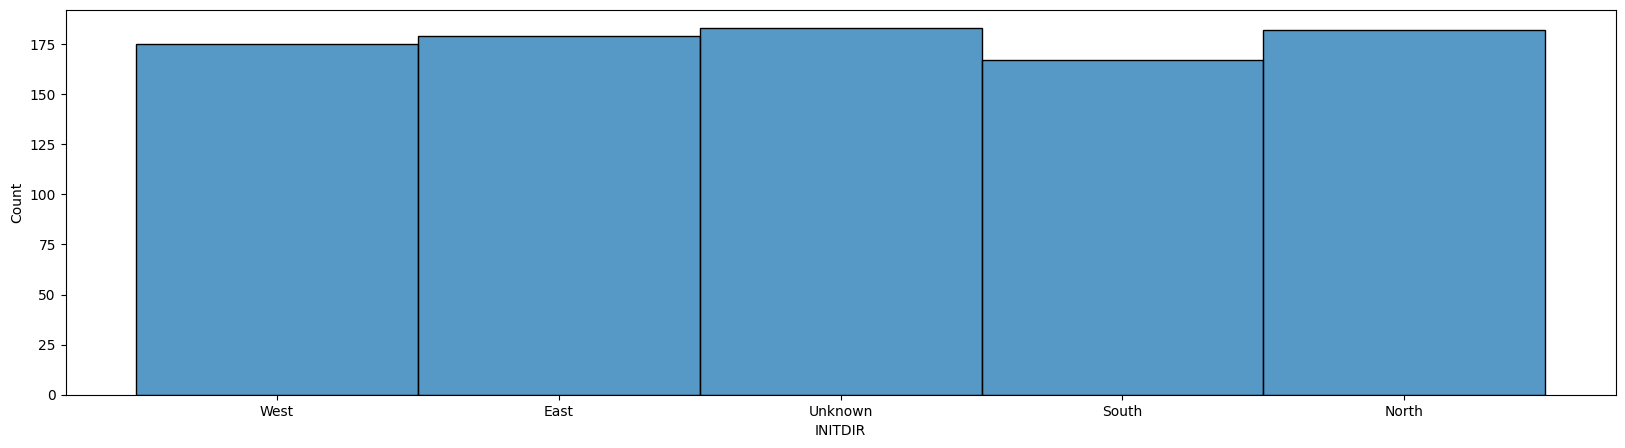

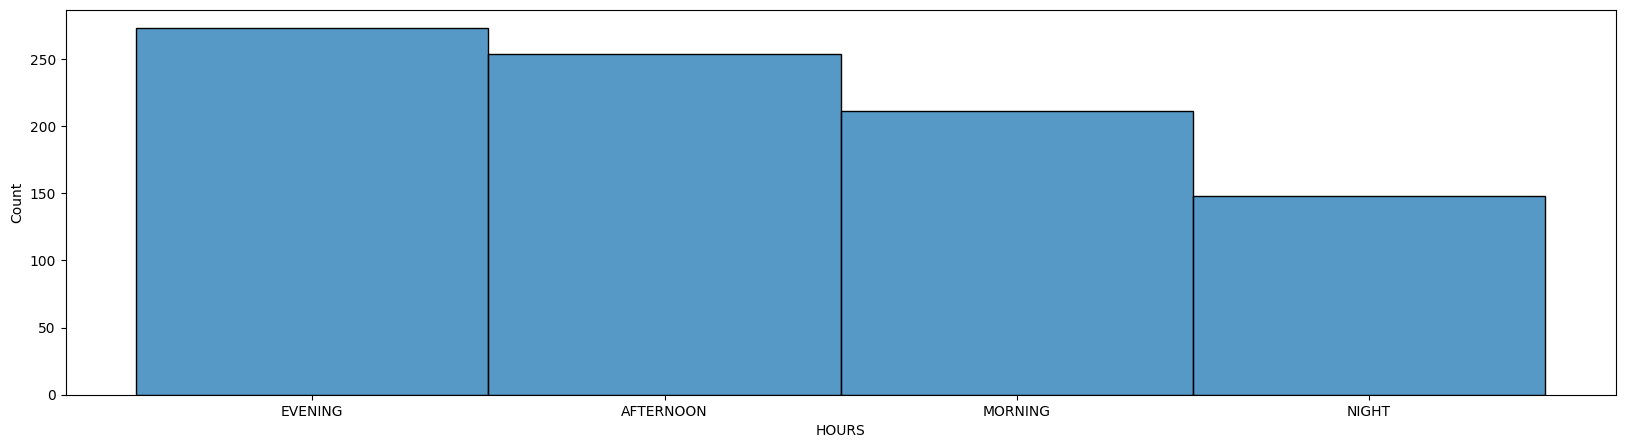

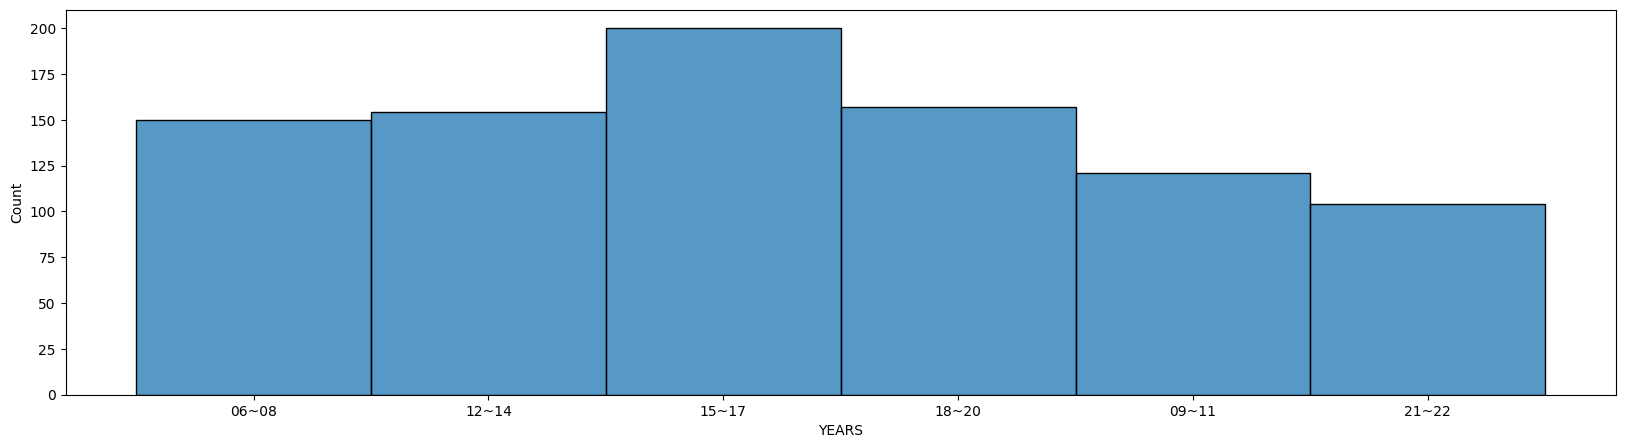

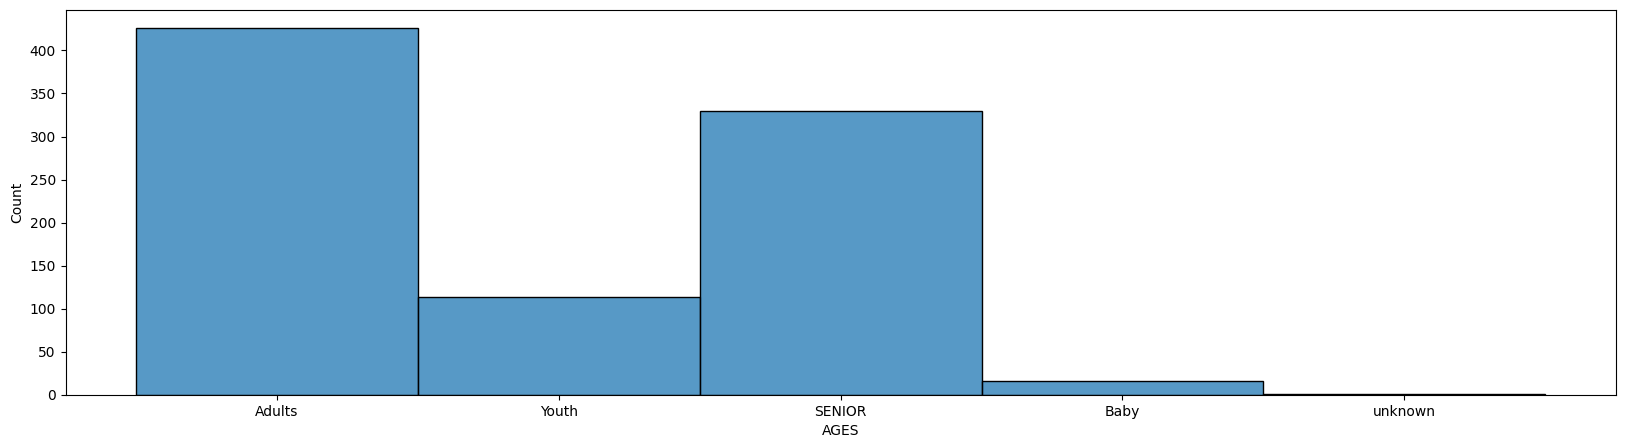

In [ ]:
df1 = df.select_dtypes(['object'])
for i, col in enumerate(df1.columns):
    plt.figure(i, figsize=(20,5))
    sns.histplot(x=col, data=df1)

In [ ]:
df.head()

,ROAD_CLASS,DISTRICT,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,INITDIR,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,ObjectId,HOURS,WEEKDAY,YEARS,AGES
0,Minor Arterial,Scarborough,Mid-Block,No Control,Clear,Dark,Wet,Approaching,Driver,West,0,0,1,0,0,0,0,0,0,0,0,0,0,1,EVENING,5,06~08,Adults
1,Major Arterial,Etobicoke York,Intersection,Pedestrian Crossover,Clear,Dark,Dry,Pedestrian Collisions,Pedestrian,East,1,0,1,0,0,0,0,1,0,1,0,0,0,2,EVENING,6,06~08,Youth
2,Major Arterial,Scarborough,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Pedestrian,East,1,0,1,0,0,0,0,0,0,0,0,0,0,3,AFTERNOON,0,06~08,SENIOR
3,Collector,North York,Intersection,No Control,Clear,Daylight,Wet,SMV Other,Passenger,Unknown,0,0,1,0,0,0,0,1,1,1,0,0,0,4,MORNING,2,06~08,Youth
4,Major Arterial,Scarborough,Intersection,No Control,Clear,Dusk,Dry,Pedestrian Collisions,Pedestrian,West,1,0,1,0,0,0,0,0,1,1,0,0,0,5,EVENING,5,06~08,Adults


In [ ]:
nominal_cols = ['ROAD_CLASS','DISTRICT','LOCCOORD','TRAFFCTL','VISIBILITY','LIGHT','RDSFCOND',
                'IMPACTYPE','INVTYPE','INITDIR','HOURS','WEEKDAY','YEARS','AGES']

In [ ]:
df_onehot = pd.get_dummies(df, columns = nominal_cols, dtype='int')

In [ ]:
df_onehot

,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,ObjectId,ROAD_CLASS_Collector,ROAD_CLASS_Expressway,ROAD_CLASS_Expressway Ramp,ROAD_CLASS_Laneway,ROAD_CLASS_Local,ROAD_CLASS_Major Arterial,ROAD_CLASS_Minor Arterial,DISTRICT_Etobicoke York,DISTRICT_North York,DISTRICT_Scarborough,DISTRICT_Toronto and East York,LOCCOORD_Intersection,LOCCOORD_Mid-Block,LOCCOORD_Mid-Block (Abnormal),"LOCCOORD_Park, Private Property, Public Lane",TRAFFCTL_No Control,TRAFFCTL_Pedestrian Crossover,TRAFFCTL_Stop Sign,TRAFFCTL_Traffic Gate,TRAFFCTL_Traffic Signal,VISIBILITY_Clear,"VISIBILITY_Fog, Mist, Smoke, Dust",VISIBILITY_Freezing Rain,VISIBILITY_Other,VISIBILITY_Rain,VISIBILITY_Snow,VISIBILITY_Strong wind,LIGHT_Dark,"LIGHT_Dark, artificial",LIGHT_Dawn,"LIGHT_Dawn, artificial",LIGHT_Daylight,"LIGHT_Daylight, artificial",LIGHT_Dusk,"LIGHT_Dusk, artificial",LIGHT_Other,RDSFCOND_Dry,RDSFCOND_Ice,RDSFCOND_Loose Snow,RDSFCOND_Other,RDSFCOND_Packed Snow,RDSFCOND_Slush,RDSFCOND_Wet,IMPACTYPE_Angle,IMPACTYPE_Approaching,IMPACTYPE_Cyclist Collisions,IMPACTYPE_Other,IMPACTYPE_Pedestrian Collisions,IMPACTYPE_Rear End,IMPACTYPE_SMV Other,IMPACTYPE_SMV Unattended Vehicle,IMPACTYPE_Sideswipe,IMPACTYPE_Turning Movement,INVTYPE_Cyclist,INVTYPE_Driver,INVTYPE_Moped Driver,INVTYPE_Motorcycle Driver,INVTYPE_Motorcycle Passenger,INVTYPE_Passenger,INVTYPE_Pedestrian,INVTYPE_Truck Driver,INVTYPE_Wheelchair,INITDIR_East,INITDIR_North,INITDIR_South,INITDIR_Unknown,INITDIR_West,HOURS_AFTERNOON,HOURS_EVENING,HOURS_MORNING,HOURS_NIGHT,WEEKDAY_0,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6,YEARS_06~08,YEARS_09~11,YEARS_12~14,YEARS_15~17,YEARS_18~20,YEARS_21~22,AGES_Adults,AGES_Baby,AGES_SENIOR,AGES_Youth,AGES_unknown
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,1,1,1,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,1,1,0,0,0,5,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,1,0,1,0,0,0,0,1,0,0,0,0,0,927,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
927,1,0,1,0,0,0,0,0,1,1,0,0,0,928,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
928,0,0,1,0,0,1,0,0,0,0,0,0,0,929,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
929,1,0,1,0,0,0,0,0,0,0,0,0,0,930,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
X = df_onehot.drop('AG_DRIV', axis = 1)
y = df_onehot.AG_DRIV

In [ ]:
df.AG_DRIV.value_counts()

0    479
1    407
Name: AG_DRIV, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11, stratify=y)

[Text(0.5902405474040632, 0.9736842105263158, 'x[8] <= 0.5\ngini = 0.497\nsamples = 620\nvalue = [335, 285]'),
 Text(0.5812112020316027, 0.9210526315789473, 'x[28] <= 0.5\ngini = 0.447\nsamples = 506\nvalue = [335, 171]'),
 Text(0.40014813769751695, 0.868421052631579, 'x[9] <= 0.5\ngini = 0.495\nsamples = 231\nvalue = [104, 127]'),
 Text(0.3911187923250564, 0.8157894736842105, 'x[62] <= 0.5\ngini = 0.498\nsamples = 197\nvalue = [104, 93]'),
 Text(0.38208944695259595, 0.7631578947368421, 'x[66] <= 0.5\ngini = 0.5\nsamples = 187\nvalue = [94, 93]'),
 Text(0.30368227990970653, 0.7105263157894737, 'x[29] <= 0.5\ngini = 0.499\nsamples = 175\nvalue = [83, 92]'),
 Text(0.29465293453724606, 0.6578947368421053, 'x[94] <= 0.5\ngini = 0.5\nsamples = 167\nvalue = [83, 84]'),
 Text(0.14686794582392776, 0.6052631578947368, 'x[11] <= 0.5\ngini = 0.497\nsamples = 138\nvalue = [74, 64]'),
 Text(0.13783860045146726, 0.5526315789473685, 'x[0] <= 0.5\ngini = 0.499\nsamples = 135\nvalue = [71, 64]'),
 Text

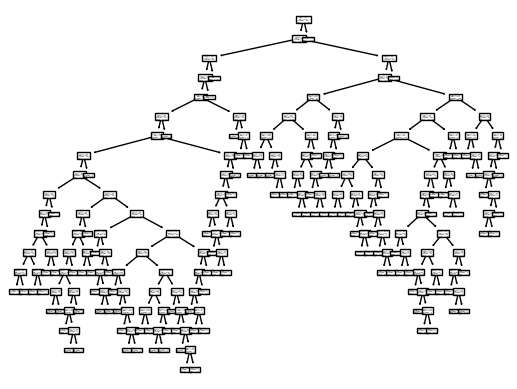

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plot_tree(clf)

In [ ]:
print('ACC: ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ACC:  0.7781954887218046
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       144
           1       0.73      0.81      0.77       122

    accuracy                           0.78       266
   macro avg       0.78      0.78      0.78       266
weighted avg       0.78      0.78      0.78       266



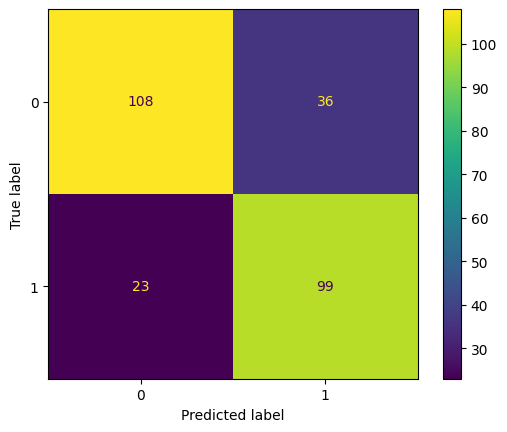

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf= 30)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('ACC: ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ACC:  0.8233082706766918
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       144
           1       0.95      0.65      0.77       122

    accuracy                           0.82       266
   macro avg       0.86      0.81      0.81       266
weighted avg       0.85      0.82      0.82       266



[Text(0.5416666666666666, 0.9166666666666666, 'x[8] <= 0.5\ngini = 0.497\nsamples = 620\nvalue = [335, 285]'),
 Text(0.4583333333333333, 0.75, 'x[28] <= 0.5\ngini = 0.447\nsamples = 506\nvalue = [335, 171]'),
 Text(0.25, 0.5833333333333334, 'x[9] <= 0.5\ngini = 0.495\nsamples = 231\nvalue = [104, 127]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[72] <= 0.5\ngini = 0.498\nsamples = 197\nvalue = [104, 93]'),
 Text(0.08333333333333333, 0.25, 'gini = 0.437\nsamples = 59\nvalue = [40, 19]'),
 Text(0.25, 0.25, 'x[18] <= 0.5\ngini = 0.497\nsamples = 138\nvalue = [64, 74]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.369\nsamples = 41\nvalue = [10, 31]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.494\nsamples = 97\nvalue = [54, 43]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[12] <= 217.5\ngini = 0.269\nsamples = 275\nvalue = [231, 44]'),
 Text(0.5, 0.4166666

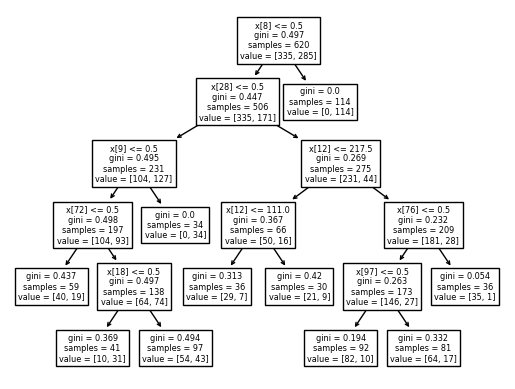

In [ ]:
plot_tree(clf)

In [ ]:
clf = AdaBoostClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('ACC: ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ACC:  0.8270676691729323
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       144
           1       0.87      0.73      0.79       122

    accuracy                           0.83       266
   macro avg       0.84      0.82      0.82       266
weighted avg       0.83      0.83      0.82       266



In [ ]:
clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('ACC: ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ACC:  0.8345864661654135
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       144
           1       0.85      0.77      0.81       122

    accuracy                           0.83       266
   macro avg       0.84      0.83      0.83       266
weighted avg       0.84      0.83      0.83       266



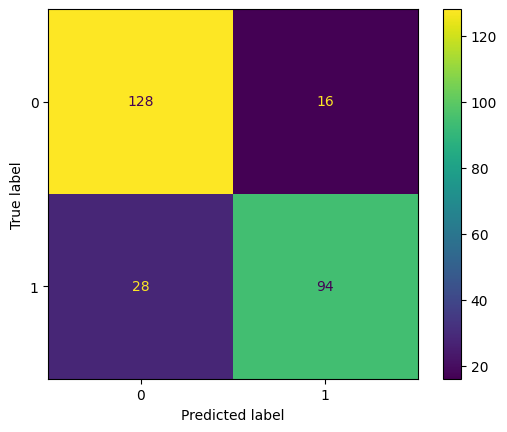

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()